In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...,NaN,NaN,NaN
47,ham,"Fair enough, anything going on?",NaN,NaN,NaN
2250,ham,I am getting threats from your sales executive...,NaN,NaN,NaN
2670,ham,Yes. They replied my mail. I'm going to the ma...,NaN,NaN,NaN
2094,spam,PRIVATE! Your 2004 Account Statement for 07742...,NaN,NaN,NaN


In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#dropping cloumns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
480,ham,"Almost there, see u in a sec"
1475,ham,Nice. Wait...should you be texting right now? ...
5094,ham,"Hi Shanil,Rakhesh here.thanks,i have exchanged..."
3596,spam,Congratulations YOU'VE Won. You're a Winner in...
2772,ham,Still in customer place


In [8]:
#renaming columns

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4122,ham,"Cool, want me to go to kappa or should I meet ..."
2889,ham,Shuhui has bought ron's present it's a swatch ...
4151,ham,What's nannys address?
1817,ham,Well i will watch shrek in 3D!!B)
2118,spam,U can WIN å£100 of Music Gift Vouchers every w...


In [10]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

In [17]:
df.duplicated().sum()

np.int64(0)

## 2. EDA (Exploratory Data analysis)

In [18]:
import matplotlib.pyplot as plt

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

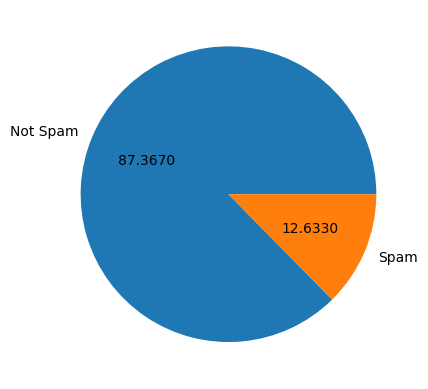

In [20]:
plt.pie(df['target'].value_counts(),labels=['Not Spam' , 'Spam'],autopct='%0.4f')
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences
631,0,Thank u!,8,3,1
4617,0,Nvm... I'm going to wear my sport shoes anyway...,75,20,3
4736,0,Nt only for driving even for many reasons she ...,175,39,2
5240,0,"Gud gud..k, chikku tke care.. sleep well gud nyt",48,13,1
2639,0,Why she wants to talk to me,27,7,1
2045,0,Okay... I booked all already... Including the ...,59,13,3
3852,0,"Dont worry, 1 day very big lambu ji vl come..t...",77,20,1
2031,0,"I noe la... U wana pei bf oso rite... K lor, o...",62,18,1
3609,0,"Call me. I m unable to cal. Lets meet bhaskar,...",55,15,3
3735,0,Hows the street where the end of library walk is?,49,11,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# Not Spam
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

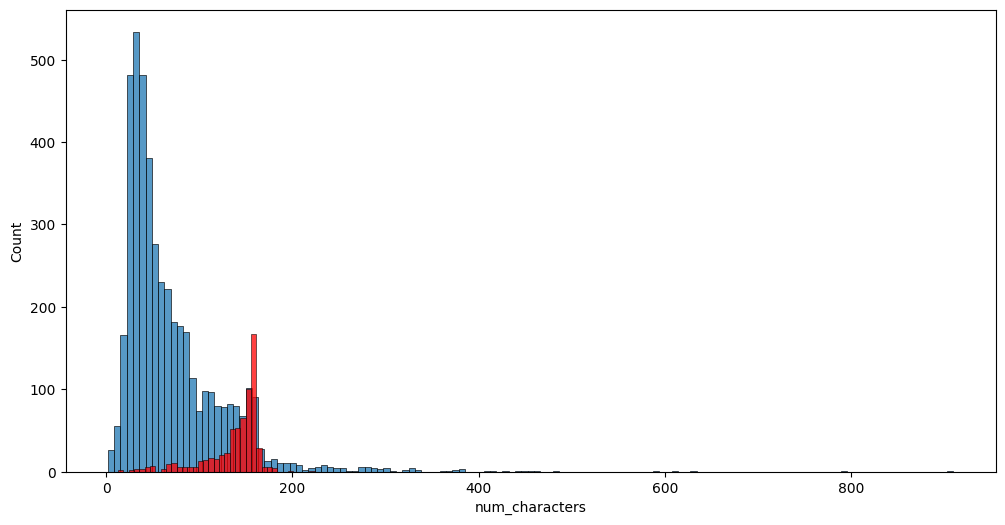

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

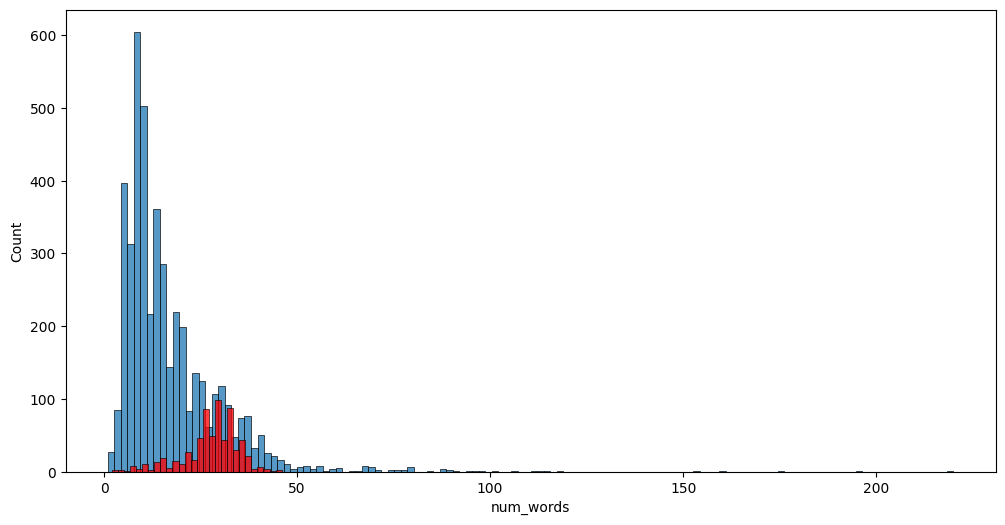

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

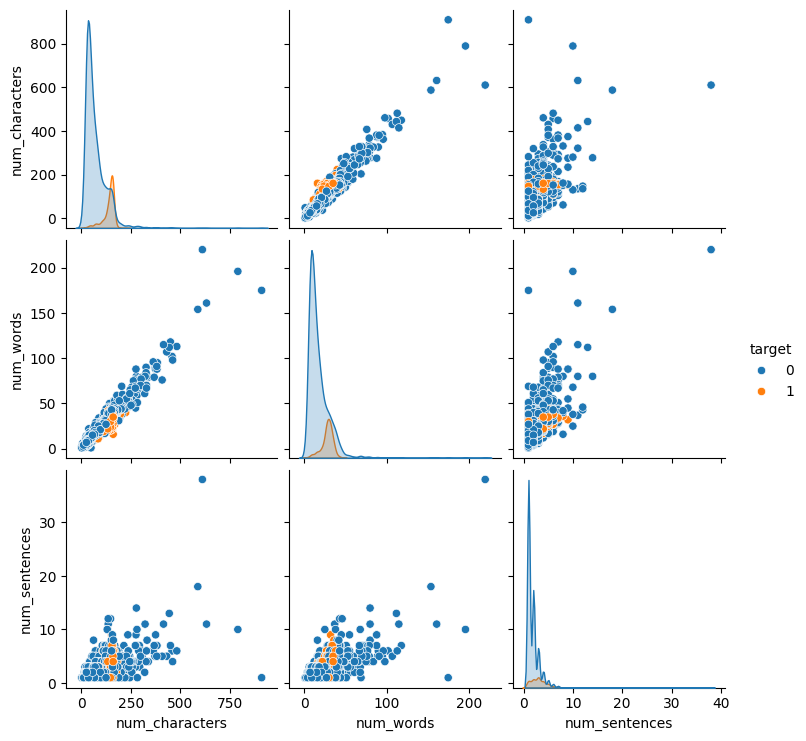

In [32]:
sns.pairplot(df,hue='target')

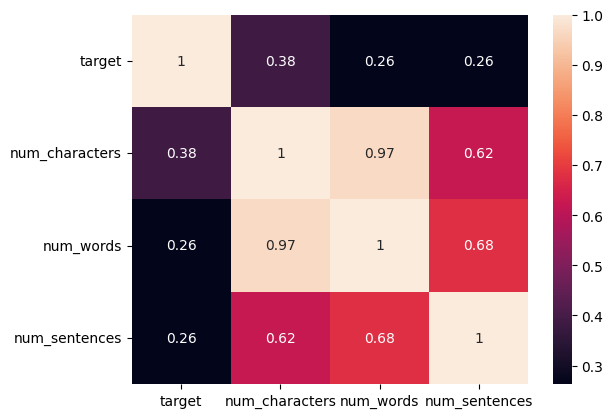

In [33]:
df.dtypes
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)
plt.show()



## 3. Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [34]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum() and i not in stopwords.words('english'):
            y.append(ps.stem(i))
    
    return " ".join(y)


[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [35]:
df['text'][2047]

'No de. But call me after some time. Ill tell you k'

In [36]:
transform_text(df['text'][2047])

'de call time ill tell k'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
3660,0,Well then you have a great weekend!,35,8,1,well great weekend
2132,1,Your B4U voucher w/c 27/03 is MARSMS. Log onto...,137,25,4,b4u voucher marsm log onto discount credit opt...
1553,0,Ok how you dear. Did you call chechi,36,9,2,ok dear call chechi
5515,0,You are a great role model. You are giving so ...,245,61,4,great role model give much realli wish day mir...
2774,0,"Dude u knw also telugu..thts gud..k, gud nyt..",46,14,1,dude u knw also telugu tht gud k gud nyt


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

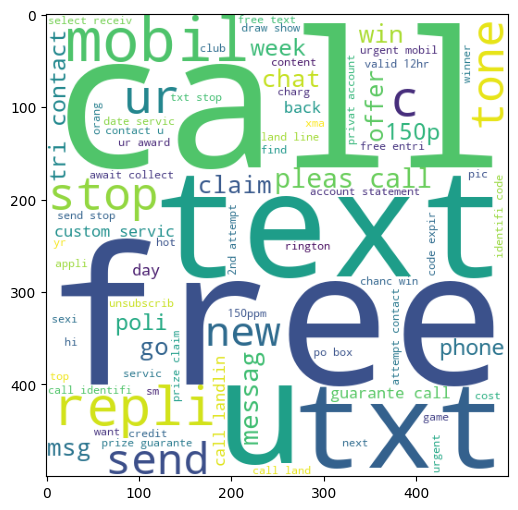

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [43]:
Not_spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

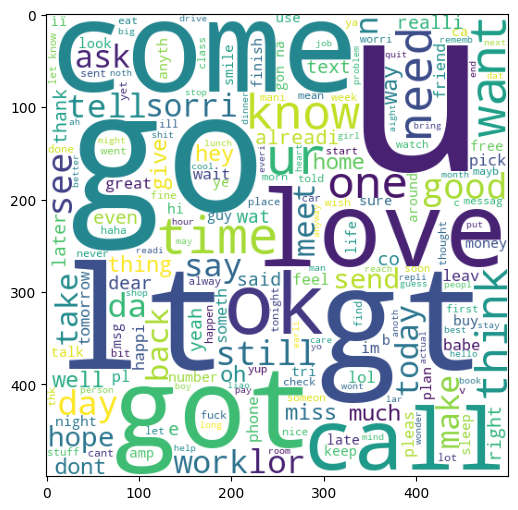

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(Not_spam_wc)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [48]:
len(spam_corpus)

9939

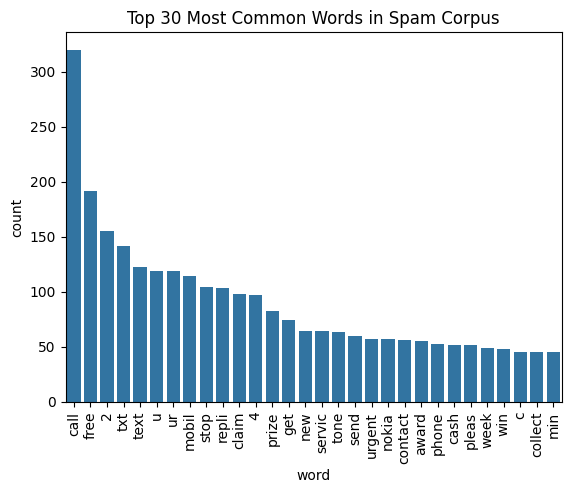

In [50]:
from collections import Counter
word_counts_df = pd.DataFrame(Counter(spam_corpus).most_common(30), 
                             columns=['word', 'count'])


sns.barplot(x='word', y='count', data=word_counts_df)

plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

In [51]:
not_spam_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [52]:
len(not_spam_corpus)

35404

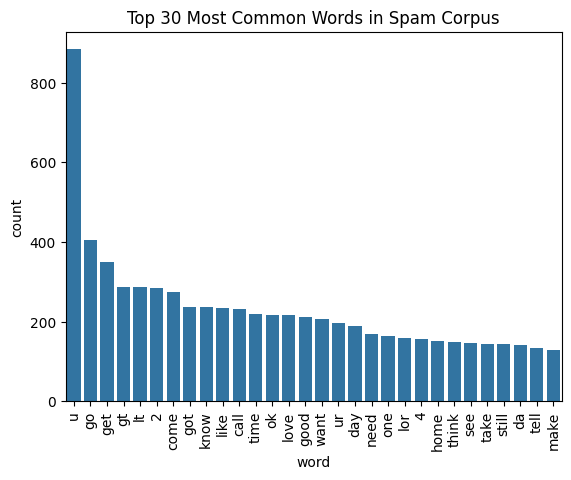

In [53]:
word_counts_df = pd.DataFrame(Counter(not_spam_corpus).most_common(30), 
                             columns=['word', 'count'])


sns.barplot(x='word', y='count', data=word_counts_df)

plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

In [54]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 1. Model Building

In [226]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()# this wasn't that precise , that's why used tfidf and was good in mnb case see below.
tfidf = TfidfVectorizer(max_features=2000)# even for this i have to try different iterations of max feautures , after selecting mnb to increase the accuracy when i saw it's precision is 100 ppercent.

In [227]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [228]:
X.shape

(5169, 2000)

In [229]:
y = df['target'].values


In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [232]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [233]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [234]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.851063829787234
[[765 131]
 [ 23 115]]
0.46747967479674796


In [235]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [236]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[895   1]
 [ 13 125]]
0.9920634920634921


In [237]:
#we chose tfidf -> mnb as of now

#comparing other models.

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [239]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [240]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [241]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [242]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9669421487603306)

In [243]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8285714285714286
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9607843137254902
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  AdaBoost
Accuracy -  0.9226305609284333
Precision -  0.8372093023255814
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.849624060150376
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563


In [244]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [245]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.976789,1.000000
8,ETC,0.977756,0.975207
0,SVC,0.975822,0.966942
5,RF,0.974855,0.966667
4,LR,0.957447,0.960784
9,GBDT,0.952611,0.932039
7,BgC,0.956480,0.849624
6,AdaBoost,0.922631,0.837209
3,DT,0.933269,0.828571


In [246]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [247]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,NB,Accuracy,0.976789
2,ETC,Accuracy,0.977756
3,SVC,Accuracy,0.975822
4,RF,Accuracy,0.974855
5,LR,Accuracy,0.957447
6,GBDT,Accuracy,0.952611
7,BgC,Accuracy,0.956480
8,AdaBoost,Accuracy,0.922631
9,DT,Accuracy,0.933269


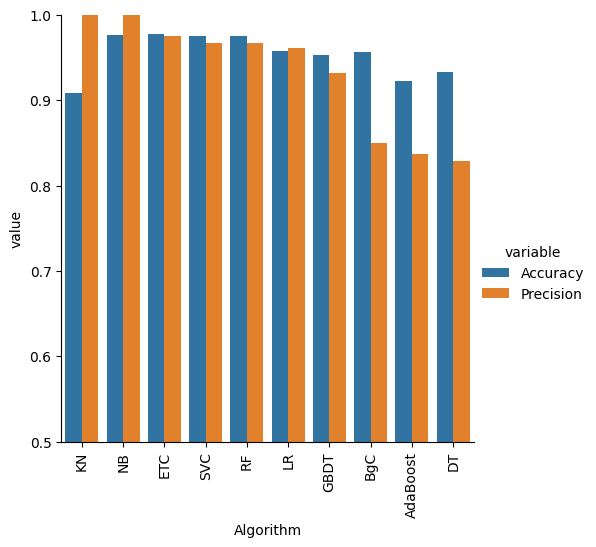

In [248]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [249]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [250]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [251]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [252]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [253]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [254]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000,0.908124,1.000000
1,NB,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,ETC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
3,SVC,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
4,RF,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667
5,LR,0.957447,0.960784,0.957447,0.960784,0.957447,0.960784,0.957447,0.960784
6,GBDT,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039
7,BgC,0.956480,0.849624,0.956480,0.849624,0.956480,0.849624,0.956480,0.849624
8,AdaBoost,0.922631,0.837209,0.922631,0.837209,0.922631,0.837209,0.922631,0.837209
9,DT,0.933269,0.828571,0.933269,0.828571,0.933269,0.828571,0.933269,0.828571


In [286]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [287]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


In [288]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [289]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [281]:
# for improvement , we tried
# 1. Change the max_features parameter of TfIdf ( 2000 - optimized)
# 2. scaling ( this was not helpful )
# 3. voting classifier ( not helpful )
# 4. stacking can also be tried.

In [260]:
# example

In [291]:
# Ensure voting is trained
# (Only run this if you haven't already trained it in the session)
# voting.fit(X_train, y_train)

# Example input for prediction
input_sms = "You have WON $1000 cash prize!!! Call now!."
transformed_sms = transform_text(input_sms)
vector_input = tfidf.transform([transformed_sms])

# Prediction
result = mnb.predict(vector_input)[0]
print("Spam" if result == 1 else "Not Spam")


Spam
